# Simulation Playground Notebook
This notebook is designed as a easy einterface to call the functions that we have defined

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import torch.optim as optim
import torch.nn as nn
import torch

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_participants_info, load_event_descriptions, load_behavioral_data, preprocess_data

# Data Preparation
Let's prepare some data first to fit our model. We are specifically using ["Locus coeruleus activity strengthens prioritized memories under arousal"](https://openneuro.org/datasets/ds002011/versions/1.0.0) dataset fror now.

In [2]:
DATASET_PATH = "data"
participants_df = load_participants_info(DATASET_PATH)
load_event_descriptions(DATASET_PATH)

df_behavior = load_behavioral_data(DATASET_PATH, "01")
for idx in range(2,11):
    sample_participant = f"0{idx}"
    df = load_behavioral_data(DATASET_PATH, sample_participant)
    df_behavior = pd.concat([df, df_behavior], ignore_index=True)

Let's preprocess our data first

In [3]:
X, Y, X_tensor, Y_tensor, scaler_X, scaler_Y, df_clean = preprocess_data(df_behavior)

X Shape: torch.Size([1699, 7]), Y Shape: torch.Size([1699])
Y Min: -1.0, Y Max: 1.0


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Training

In [5]:
from train import (train_feed_forward_nn,
                   train_vanilla_rnn,
                   train_vanilla_lstm,
                   train_vanilla_lc_model,
                   train_lstm_lc_model,
                   train_neural_gadget_model,
                   train_ff_controller
                   )
from analysis.evaluation import evaluate_model

## Fully Connected Neural Network

To illustrate our idea, we want to train 2 models from math and computer science, which is our vanilla feed forward networks and an recurrent networks.

Epoch 0, Loss: 0.13144716620445251
Epoch 100, Loss: 0.04836903512477875
Epoch 200, Loss: 0.04699259623885155
Epoch 300, Loss: 0.04544540494680405
Epoch 400, Loss: 0.044450510293245316
Epoch 500, Loss: 0.043616991490125656
Epoch 600, Loss: 0.04231775179505348
Epoch 700, Loss: 0.041985683143138885
Epoch 800, Loss: 0.04095785319805145
Epoch 900, Loss: 0.04140206053853035
Epoch 1000, Loss: 0.04061966389417648
Epoch 1100, Loss: 0.03949246183037758
Epoch 1200, Loss: 0.03966159000992775
Epoch 1300, Loss: 0.03894020617008209
Epoch 1400, Loss: 0.03892601281404495
Epoch 1500, Loss: 0.038556139916181564
Epoch 1600, Loss: 0.03829704225063324
Epoch 1700, Loss: 0.03836245462298393
Epoch 1800, Loss: 0.03787212446331978
Epoch 1900, Loss: 0.03775615990161896
Training complete!
Evaluating Model: FeedForwardNN


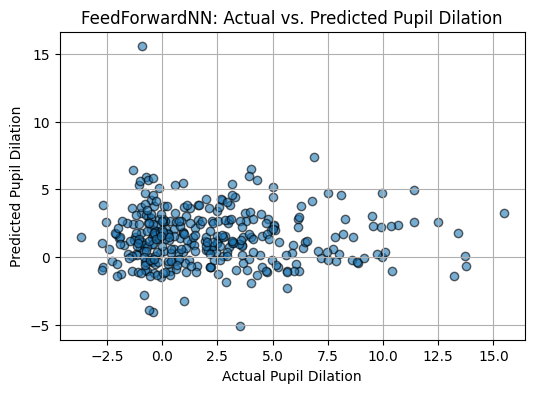

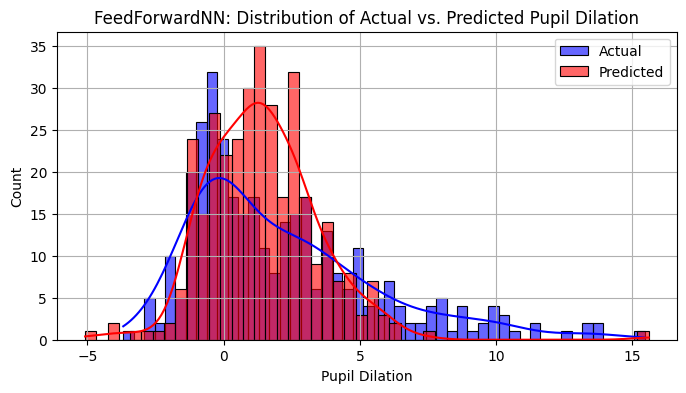

FeedForwardNN - Pearson Correlation: -0.0042


In [6]:
model_ff = train_feed_forward_nn(X_train, Y_train,epochs=2000)
evaluate_model(model_ff, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Recurent Neural Networks

We will  do the same thing with an recurrent neural network

X_rnn Shape: torch.Size([1359, 1, 7]), Y_rnn Shape: torch.Size([1359, 1])
Epoch 0, Loss: 0.1566
Epoch 100, Loss: 0.0508
Epoch 200, Loss: 0.0492
Epoch 300, Loss: 0.0485
Epoch 400, Loss: 0.0481
Epoch 500, Loss: 0.0476
Epoch 600, Loss: 0.0470
Epoch 700, Loss: 0.0468
Epoch 800, Loss: 0.0466
Epoch 900, Loss: 0.0464
Epoch 1000, Loss: 0.0467
Epoch 1100, Loss: 0.0460
Epoch 1200, Loss: 0.0458
Epoch 1300, Loss: 0.0455
Epoch 1400, Loss: 0.0451
Epoch 1500, Loss: 0.0451
Epoch 1600, Loss: 0.0446
Epoch 1700, Loss: 0.0445
Epoch 1800, Loss: 0.0455
Epoch 1900, Loss: 0.0442
Training complete!
Evaluating Model: RecurrentNet


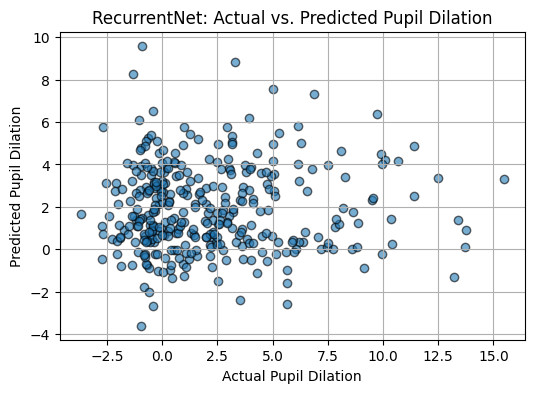

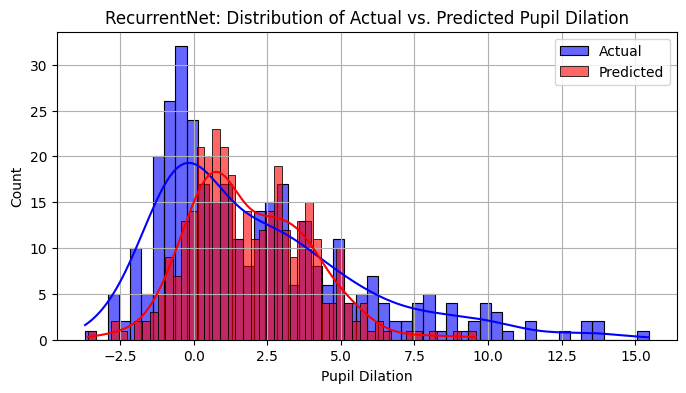

RecurrentNet - Pearson Correlation: 0.0251


In [7]:
model_rnn = train_vanilla_rnn(X_train, Y_train, epochs=2000)
evaluate_model(model_rnn, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Models

Epoch 0, Loss: 0.038985
Epoch 100, Loss: 0.044198
Epoch 200, Loss: 0.070512
Epoch 300, Loss: 0.091859


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 400, Loss: 0.070565
Epoch 500, Loss: 0.086232
Epoch 600, Loss: 0.073859
Epoch 700, Loss: 0.046800
Epoch 800, Loss: 0.086560
Epoch 900, Loss: 0.085027
Epoch 1000, Loss: 0.044644
Epoch 1100, Loss: 0.058843
Epoch 1200, Loss: 0.071887
Epoch 1300, Loss: 0.090826
Epoch 1400, Loss: 0.038272
Epoch 1500, Loss: 0.099280
Epoch 1600, Loss: 0.107206
Epoch 1700, Loss: 0.039433
Epoch 1800, Loss: 0.075980
Epoch 1900, Loss: 0.050440
Epoch 2000, Loss: 0.072319
Epoch 2100, Loss: 0.067826
Epoch 2200, Loss: 0.062026
Epoch 2300, Loss: 0.039564
Epoch 2400, Loss: 0.140878
Epoch 2500, Loss: 0.036073
Epoch 2600, Loss: 0.081495
Epoch 2700, Loss: 0.069089
Epoch 2800, Loss: 0.124607
Epoch 2900, Loss: 0.065667
Epoch 3000, Loss: 0.060002
Epoch 3100, Loss: 0.104166
Epoch 3200, Loss: 0.076228
Epoch 3300, Loss: 0.043977
Epoch 3400, Loss: 0.049586
Epoch 3500, Loss: 0.037888
Epoch 3600, Loss: 0.079572
Epoch 3700, Loss: 0.095895
Epoch 3800, Loss: 0.055963
Epoch 3900, Loss: 0.060196
Epoch 4000, Loss: 0.082458
Epoch 4

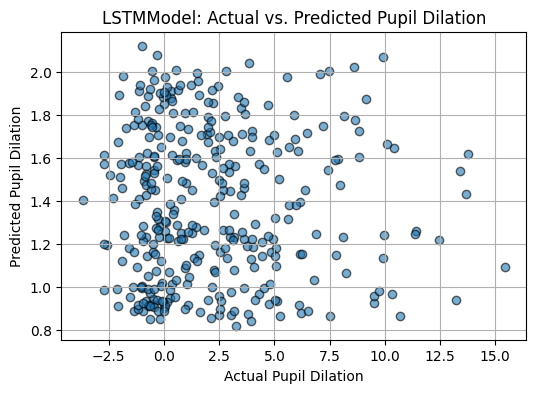

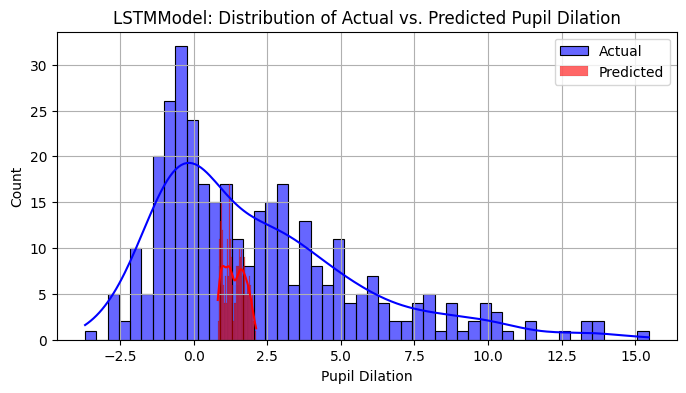

LSTMModel - Pearson Correlation: -0.0250


In [8]:
model_lstm = train_vanilla_lstm(X_train, Y_train, epochs=5000, hidden_dim=12)
evaluate_model(model_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Vanilla LCNECortex Model

Now coming to our customized LCNECortex model

Epoch 0, Loss: 0.8196884989738464


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 100, Loss: 0.10176064074039459
Epoch 200, Loss: 0.09387445449829102
Epoch 300, Loss: 0.0733208879828453
Epoch 400, Loss: 0.12183181196451187
Epoch 500, Loss: 0.0825110450387001
Epoch 600, Loss: 0.08064170181751251
Epoch 700, Loss: 0.08548765629529953
Epoch 800, Loss: 0.09314791858196259
Epoch 900, Loss: 0.08405877649784088
Epoch 1000, Loss: 0.12791630625724792
Epoch 1100, Loss: 0.10672840476036072
Epoch 1200, Loss: 0.10252834111452103
Epoch 1300, Loss: 0.10736893117427826
Epoch 1400, Loss: 0.06755197793245316
Epoch 1500, Loss: 0.11401157081127167
Epoch 1600, Loss: 0.13417886197566986
Epoch 1700, Loss: 0.12500572204589844
Epoch 1800, Loss: 0.0970081090927124
Epoch 1900, Loss: 0.05873184651136398
Training complete!
Evaluating Model: LCNECortexFitter


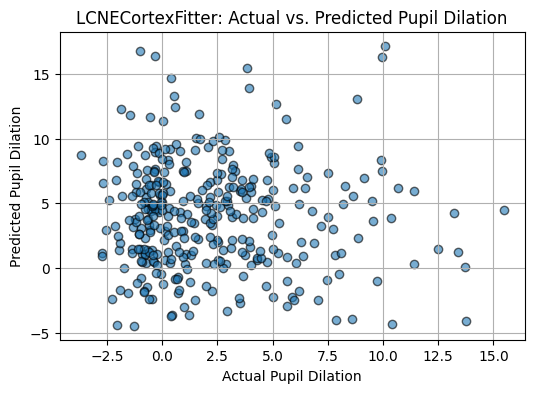

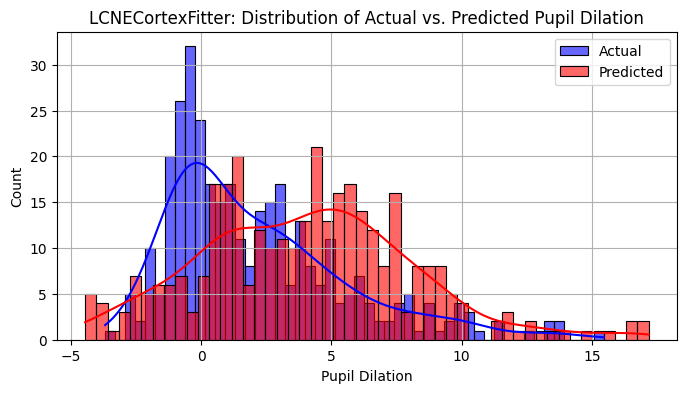

LCNECortexFitter - Pearson Correlation: -0.0318


In [9]:
model_lc_vanilla = train_vanilla_lc_model(X_train, Y_train, epochs=2000)
evaluate_model(model_lc_vanilla, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM LCNECortex Model

Epoch 0, Loss: 0.09596366435289383


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/nn/modules/loss.py:1040: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


Epoch 100, Loss: 0.02695516124367714
Epoch 200, Loss: 0.03938615694642067
Epoch 300, Loss: 0.04382607340812683
Epoch 400, Loss: 0.04634353145956993
Epoch 500, Loss: 0.01837313175201416
Epoch 600, Loss: 0.028769411146640778
Epoch 700, Loss: 0.029590945690870285
Epoch 800, Loss: 0.024255940690636635
Epoch 900, Loss: 0.01709676906466484
Epoch 1000, Loss: 0.02614850364625454
Epoch 1100, Loss: 0.03993989899754524
Epoch 1200, Loss: 0.0298030823469162
Epoch 1300, Loss: 0.021097008138895035
Epoch 1400, Loss: 0.02313757874071598
Epoch 1500, Loss: 0.02626320905983448
Epoch 1600, Loss: 0.03617727383971214
Epoch 1700, Loss: 0.030316131189465523
Epoch 1800, Loss: 0.03194163739681244
Epoch 1900, Loss: 0.027736535295844078
Training complete!
Evaluating Model: LCNECortexLSTM


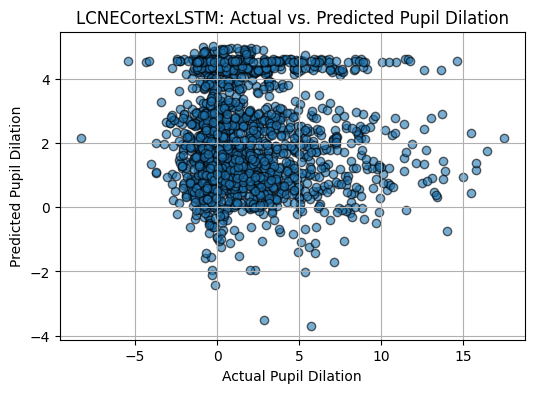

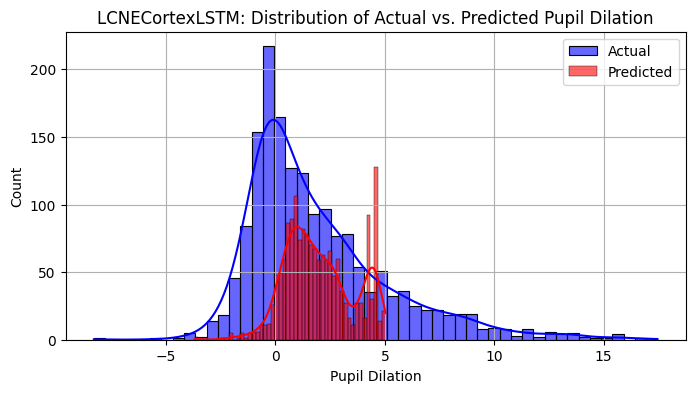

LCNECortexLSTM - Pearson Correlation: -0.0224


In [10]:
model_lc_lstm = train_lstm_lc_model(X_train, Y_train, epochs=2000, hidden_dim=64)
evaluate_model(model_lc_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Gadget Model

Epoch 0, Loss: 0.046346, LR: 0.001000


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 100, Loss: 0.053739, LR: 0.000000
Epoch 200, Loss: 0.024103, LR: 0.000000
Epoch 300, Loss: 0.016475, LR: 0.000000
Epoch 400, Loss: 0.055252, LR: 0.000000
Epoch 500, Loss: 0.014229, LR: 0.000000
Epoch 600, Loss: 0.028561, LR: 0.000000
Epoch 700, Loss: 0.029645, LR: 0.000000
Epoch 800, Loss: 0.012804, LR: 0.000000
Epoch 900, Loss: 0.019755, LR: 0.000000
Epoch 1000, Loss: 0.028603, LR: 0.000000
Early stopping at epoch 1016
Training complete!
Evaluating Model: LSTMGadget


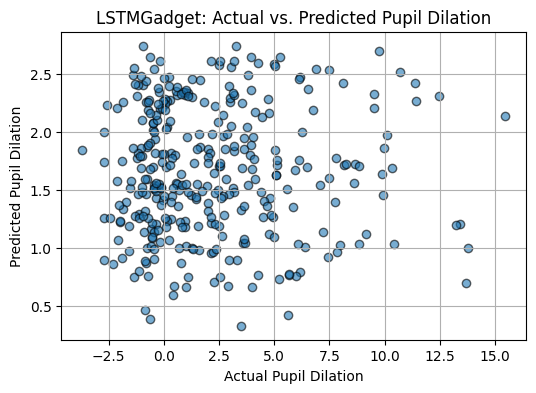

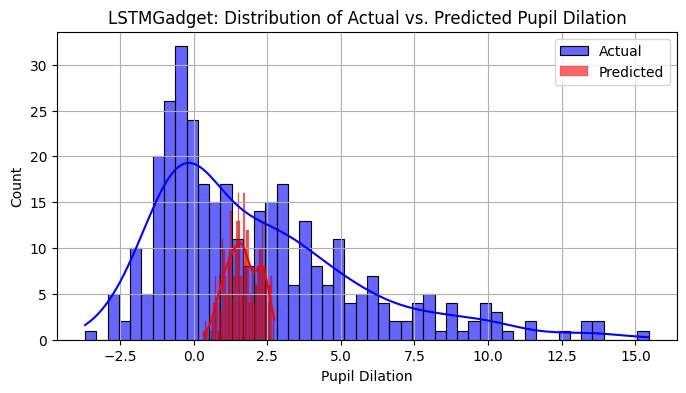

LSTMGadget - Pearson Correlation: 0.0176


In [11]:
model_gadget = train_neural_gadget_model(X_train, Y_train, epochs=2000, hidden_dim=64)
evaluate_model(model_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

# FF Gadget Model

Epoch 0, Loss: 0.05834497883915901
Epoch 100, Loss: 0.021326391026377678
Epoch 200, Loss: 0.02648726850748062
Epoch 300, Loss: 0.038175370544195175
Epoch 400, Loss: 0.022702496498823166
Epoch 500, Loss: 0.03634822368621826
Epoch 600, Loss: 0.023854468017816544
Epoch 700, Loss: 0.026026545092463493
Epoch 800, Loss: 0.025025252252817154
Epoch 900, Loss: 0.01721961982548237
Epoch 1000, Loss: 0.024436647072434425
Epoch 1100, Loss: 0.02709210477769375
Epoch 1200, Loss: 0.015108994208276272
Epoch 1300, Loss: 0.01972162537276745
Epoch 1400, Loss: 0.019203849136829376
Epoch 1500, Loss: 0.012722866609692574
Epoch 1600, Loss: 0.014752723276615143
Epoch 1700, Loss: 0.03711075708270073
Epoch 1800, Loss: 0.0240172166377306
Epoch 1900, Loss: 0.02314060926437378
Epoch 2000, Loss: 0.023774929344654083
Epoch 2100, Loss: 0.017330383881926537
Epoch 2200, Loss: 0.018152987584471703
Epoch 2300, Loss: 0.0176971685141325
Epoch 2400, Loss: 0.027814865112304688
Epoch 2500, Loss: 0.023986827582120895
Epoch 2600

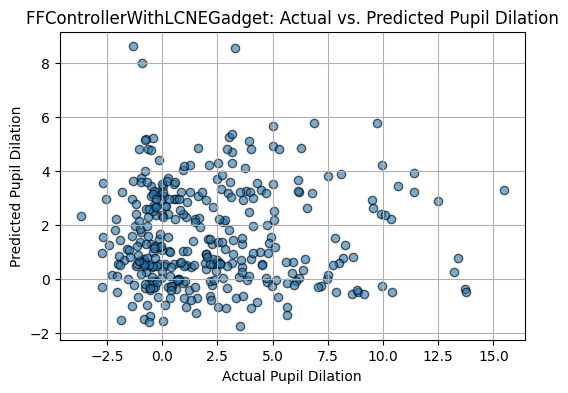

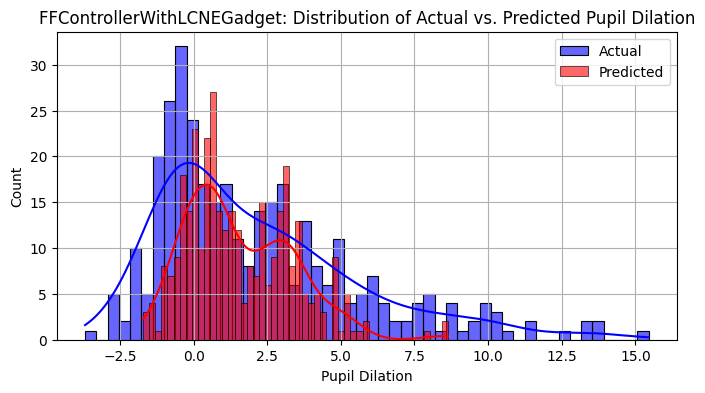

FFControllerWithLCNEGadget - Pearson Correlation: 0.0200


In [13]:
ff_gadget = train_ff_controller(X_train, Y_train, epochs=5000, hidden_dim=200)
evaluate_model(ff_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

Interesting results

# Analysis

In [28]:
from analysis.analysis import (pca_gadget,
                               pca_lcne_lstm,
                               pca_feed_forward,
                               pca_lcne,
                               firing_lcne,
                               pca_lstm,
                               pca_ff_gadget,
                               analyze_ff_gadget_activations,
)

## Feed-Forward Neural Networks

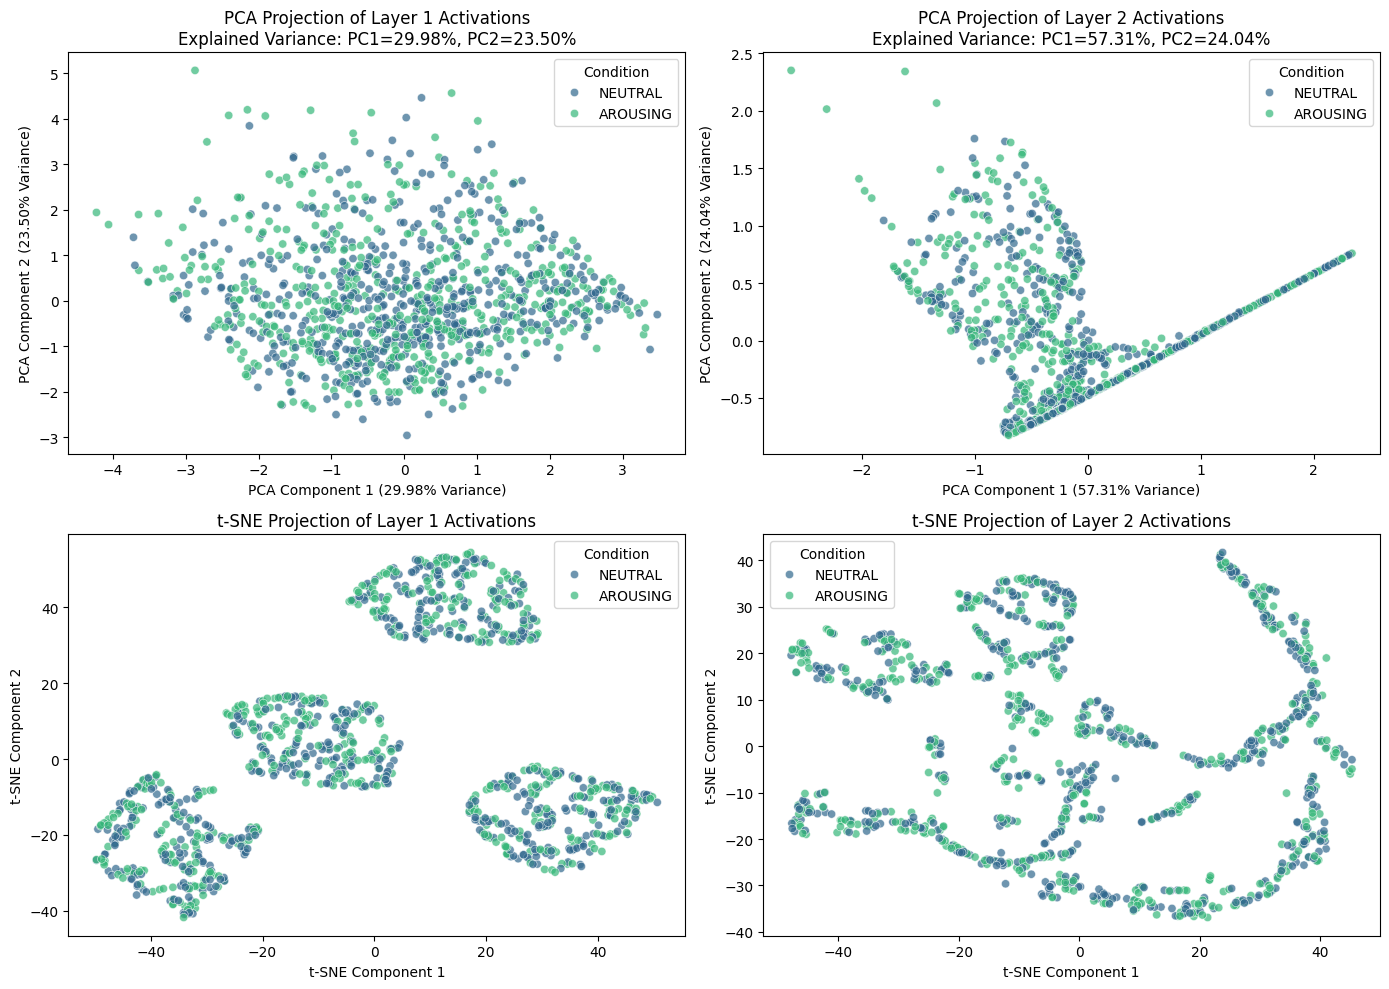

In [15]:
pca_feed_forward(model_ff, X_tensor, df_behavior)

## LCNECortex Model

We will see that, though  under fitted with the real data, there are some structureness to the data that we can play around with since we injected mechanistic insights into it.

Text(0.5, 1.0, 'Cortex Activation Distribution')

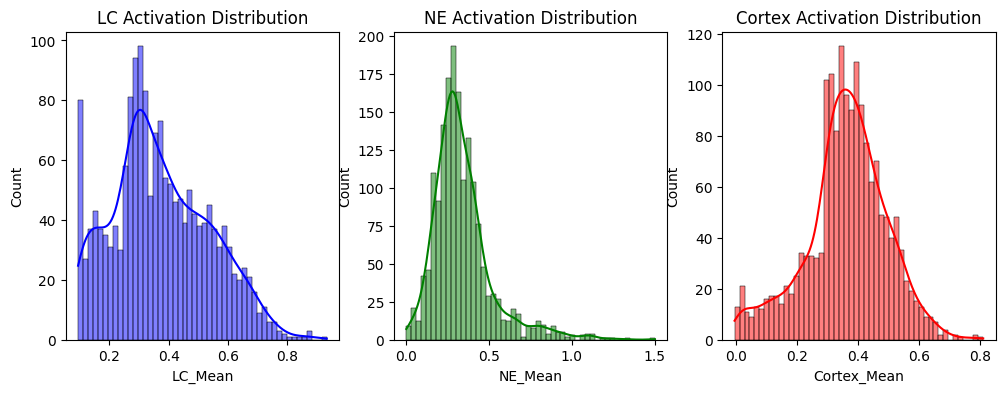

In [16]:
with torch.no_grad():
    prev_LC = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)
    prev_Cortex = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)

    LC_act, NE_act, C_act, Pupil_pred, LC_raw, NE_raw, C_raw = model_lc_vanilla(X_tensor, prev_LC, prev_Cortex, return_activations=True)

act_lc = LC_act.cpu().numpy()
act_ne = NE_act.cpu().numpy()
act_cortex = C_act.cpu().numpy()

df_activations = pd.DataFrame({
    'LC_Mean': act_lc.mean(axis=1),
    'NE_Mean': act_ne.mean(axis=1),
    'Cortex_Mean': act_cortex.mean(axis=1),
    'PupilPred': Pupil_pred.cpu().numpy().squeeze(),
    'ActualPupil': df_clean['Event_PupilDilation'].values  # Ensure this aligns with X_tensor
})

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_activations['LC_Mean'], kde=True, bins=50, color='blue')
plt.title("LC Activation Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df_activations['NE_Mean'], kde=True, bins=50, color='green')
plt.title("NE Activation Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df_activations['Cortex_Mean'], kde=True, bins=50, color='red')
plt.title("Cortex Activation Distribution")

In [17]:
# firing_lcne(model_lc_vanilla, X_test, df_clean)

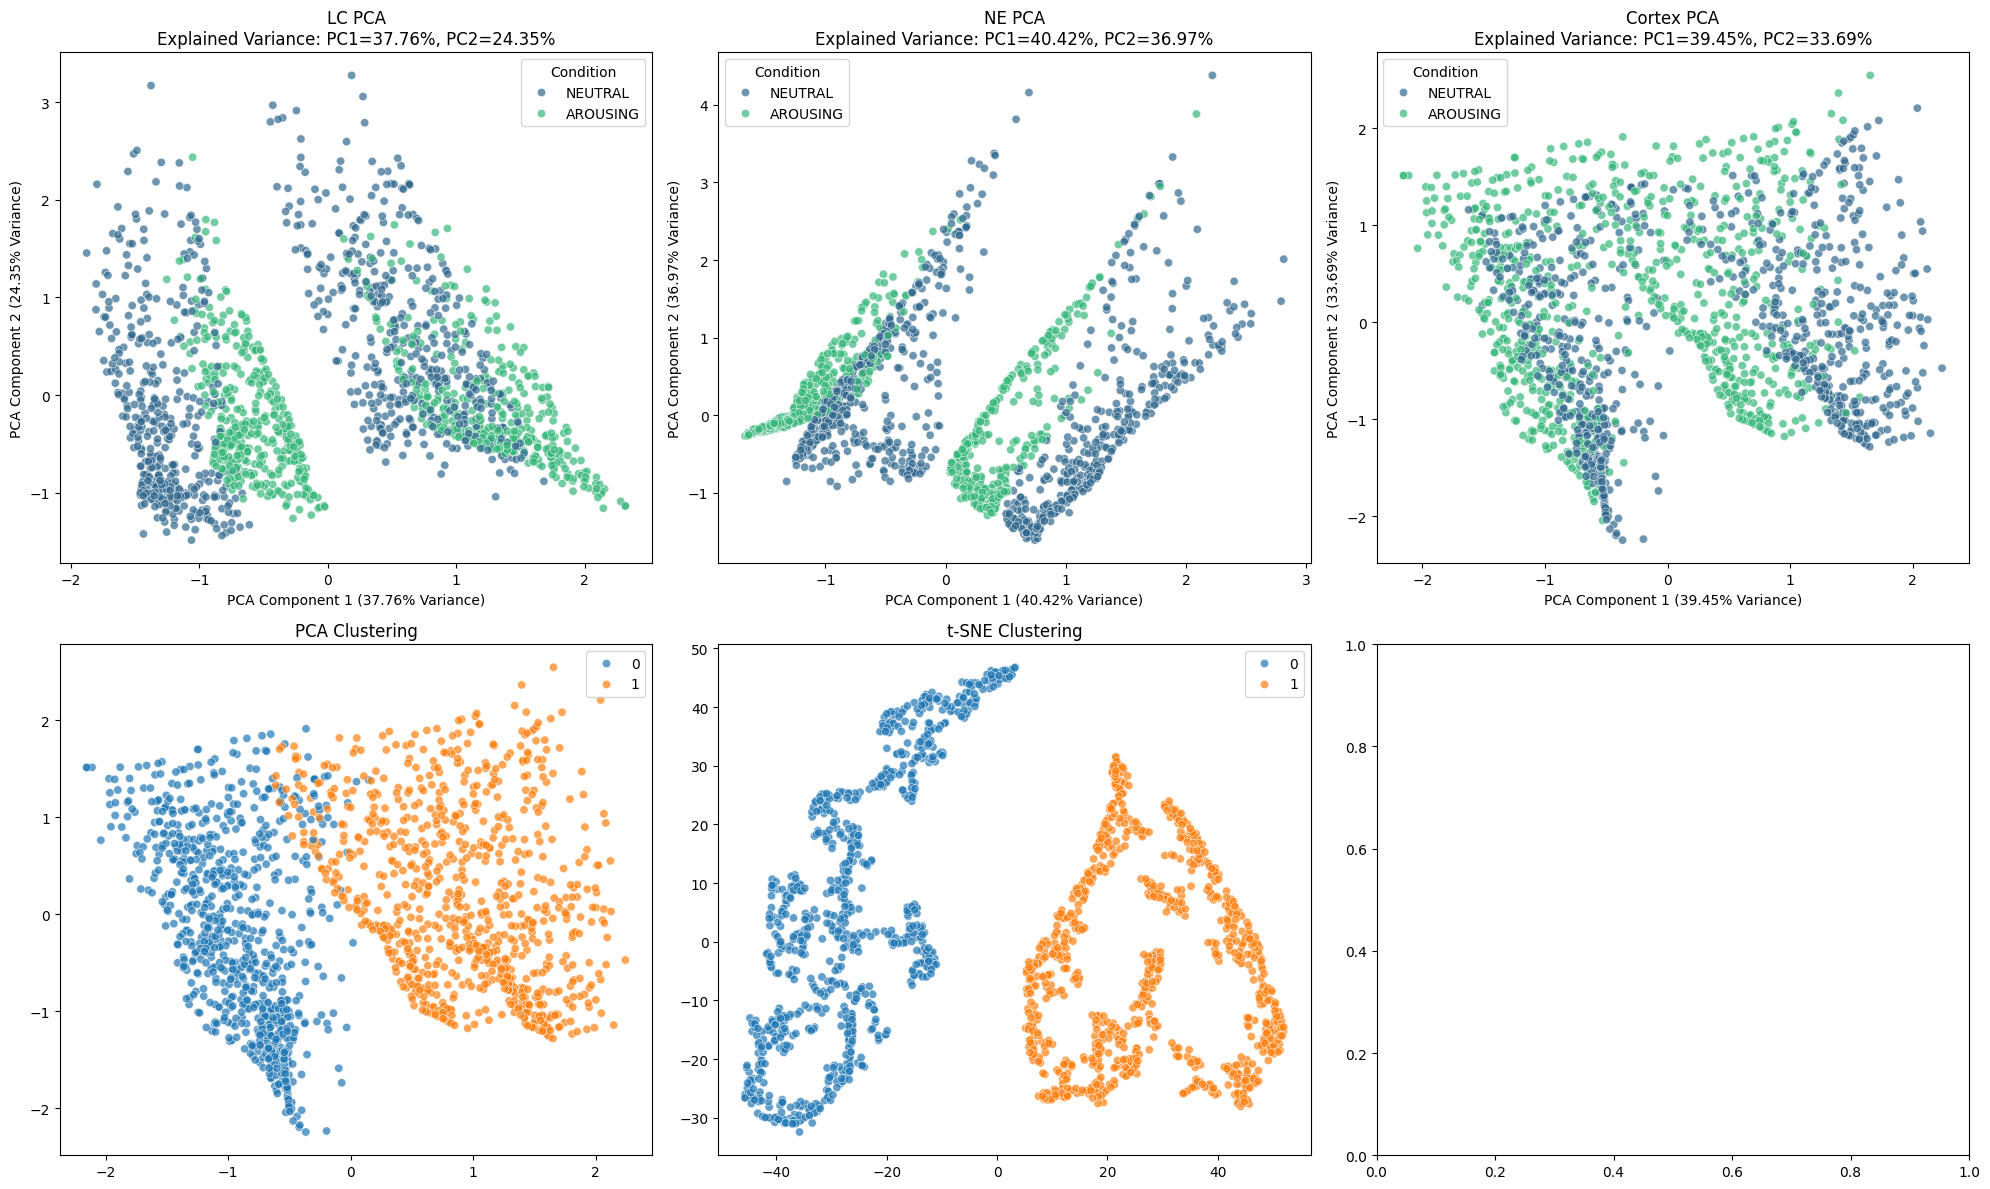

In [18]:
pca_lcne(model_lc_vanilla, X_tensor, df_clean)

## LSTM LCNECortex Model

In [19]:
# pca_lcne_lstm(model_lc_lstm, X_tensor, df_clean)

## LSTM Gadget Analysis

In [20]:
# pca_gadget(model_gadget, X_tensor, df_clean)

## Vanilla LSTM Comparison

In [21]:
# pca_lstm(model_lstm, X_test, df_clean)

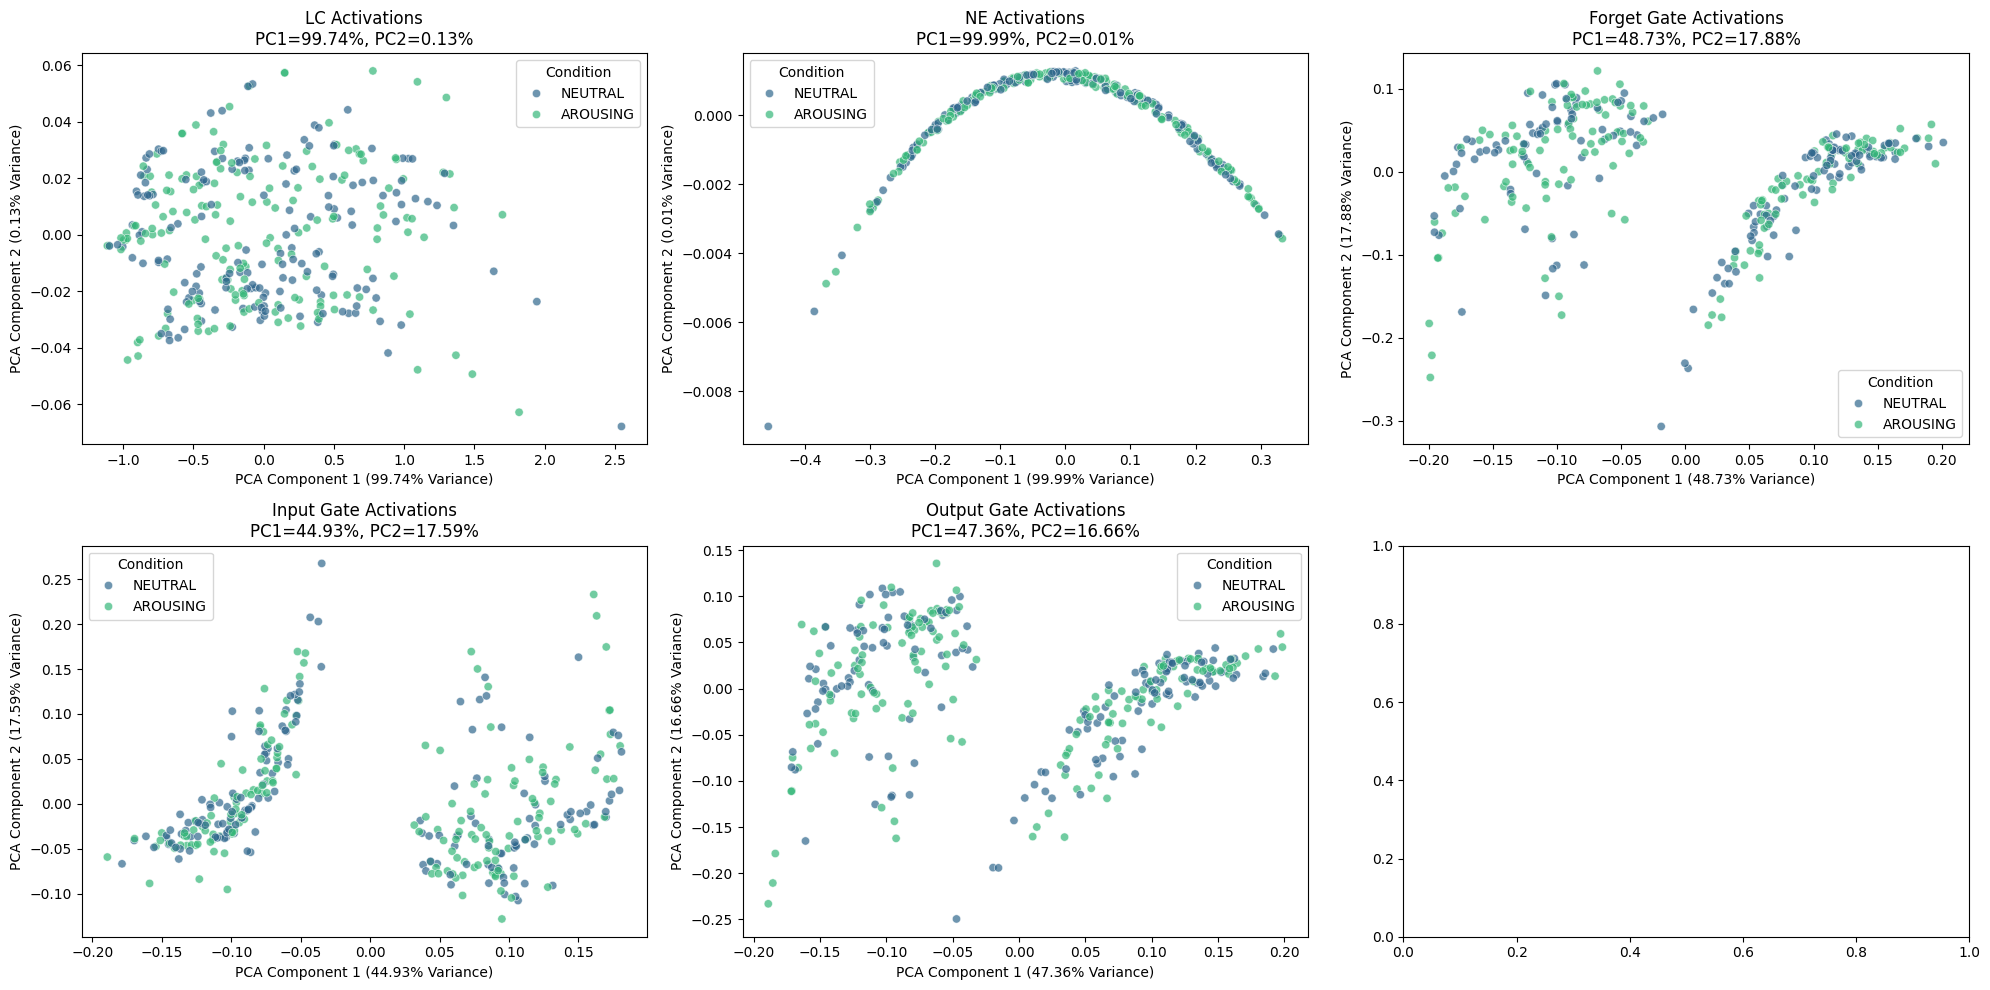

Pearson Correlation with Actual Pupil Dilation:
LC Activation: -0.060
NE Activation: -0.061
Forget Gate: -0.075
Input Gate: 0.022
Output Gate: 0.031
Predicted Pupil Dilation: 0.020


In [25]:
pca_ff_gadget(ff_gadget, X_test, df_clean)

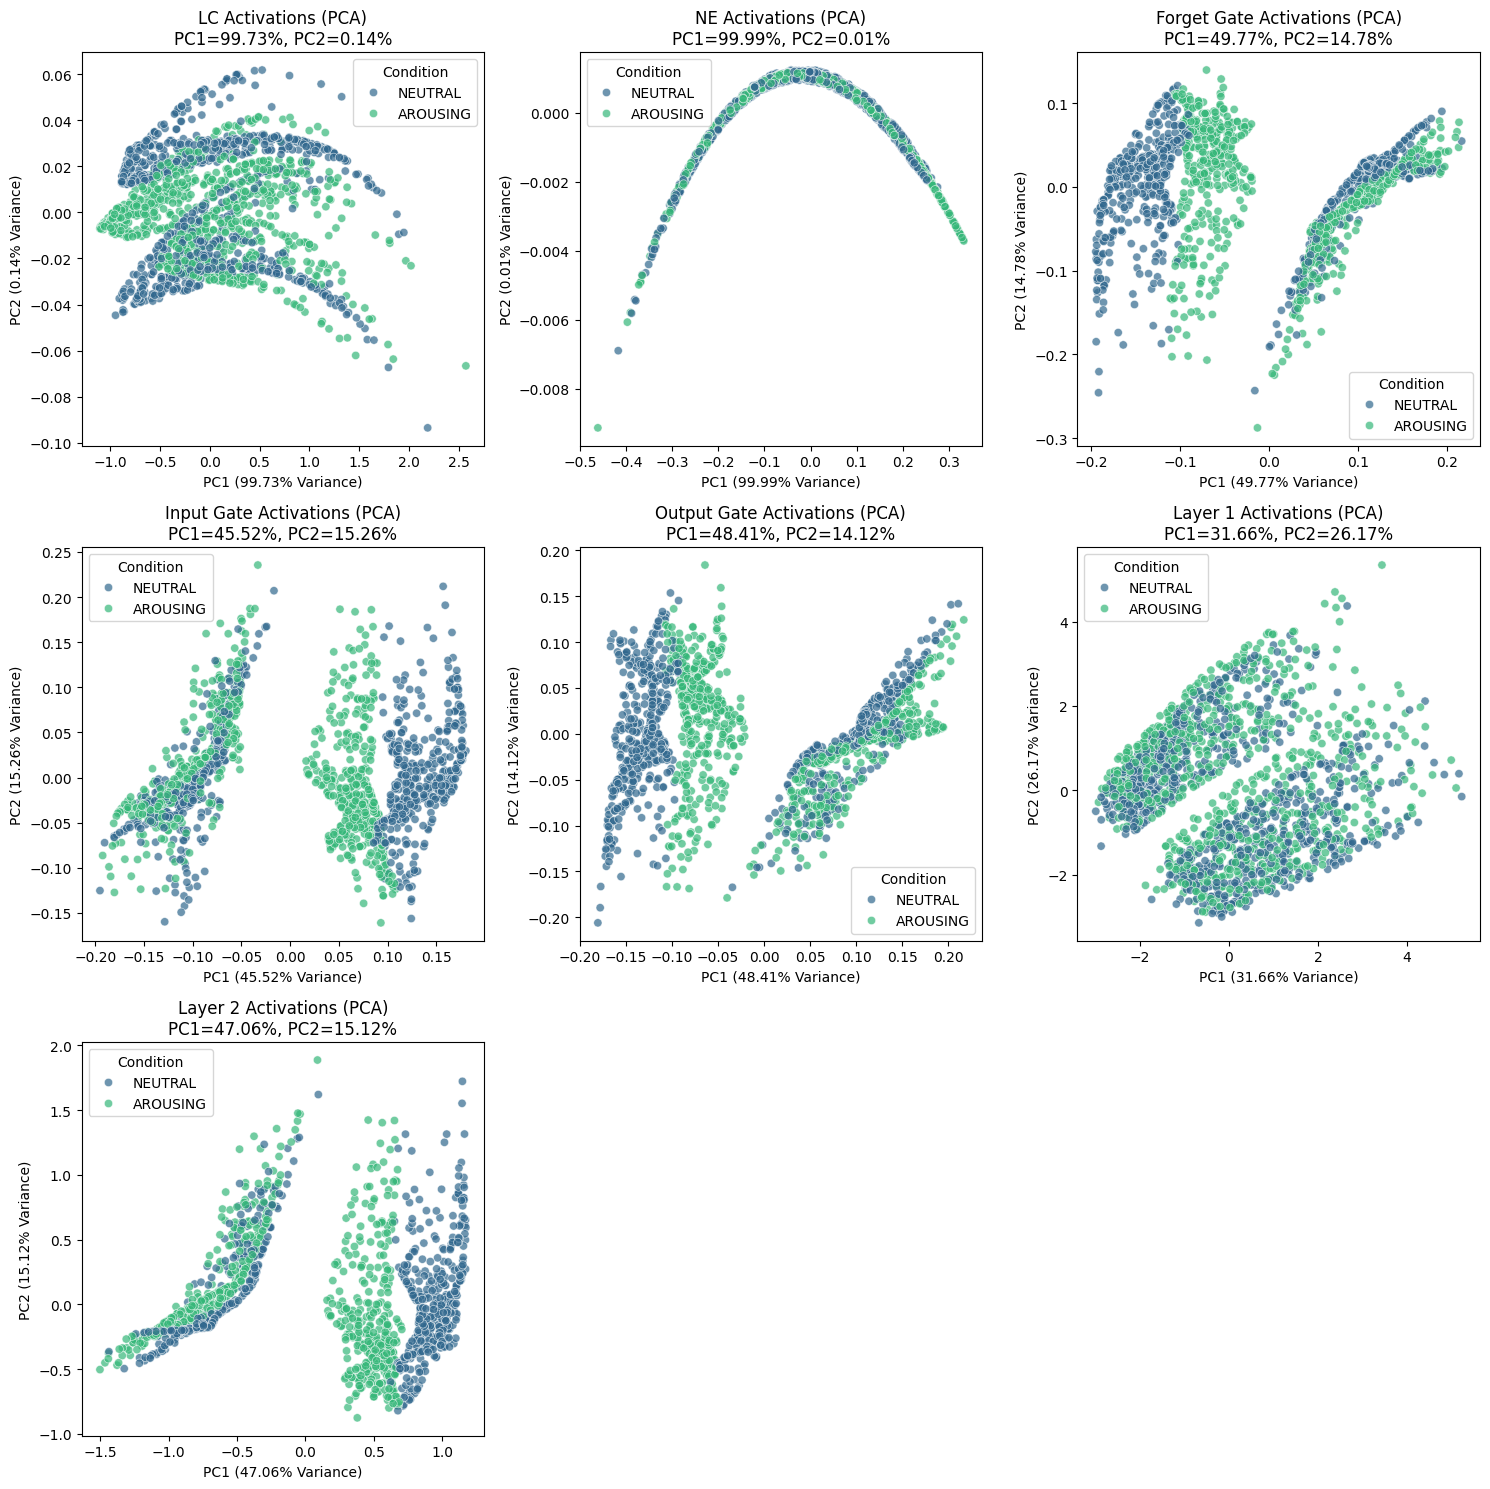


 Pearson Correlation with Actual Pupil Dilation:
LC: -0.118
NE: -0.152
Forget Gate: -0.203
Input Gate: -0.246
Output Gate: 0.402
Layer 1: -0.232
Layer 2: -0.027
Predicted Pupil Dilation: 0.536


In [31]:
analyze_ff_gadget_activations(ff_gadget, X_tensor, df_clean)